# Covid 19 X-ray chest classifier - Xception net based

3 classes
<ol>
<li>Normal</li>
<li>Covid19</li>
<li>Other Virus </li>
</ol>





In [ ]:

import tensorflow
from PIL import Image
import glob

from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
#from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
import os
for dirname, _, filenames in os.walk('./train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

./train/NORMAL/NORMAL2-IM-1027-0001.jpeg
./train/NORMAL/NORMAL2-IM-0402-0001.jpeg
./train/NORMAL/IM-0546-0001.jpeg
./train/NORMAL/IM-0667-0001.jpeg
./train/NORMAL/NORMAL2-IM-0041-0001.jpeg
./train/NORMAL/NORMAL2-IM-1089-0001.jpeg
./train/NORMAL/NORMAL2-IM-1154-0001.jpeg
./train/NORMAL/IM-0189-0001.jpeg
./train/NORMAL/IM-0568-0001.jpeg
./train/NORMAL/NORMAL2-IM-0847-0001.jpeg
./train/NORMAL/IM-0265-0001.jpeg
./train/NORMAL/NORMAL2-IM-0601-0001.jpeg
./train/NORMAL/NORMAL2-IM-0439-0001.jpeg
./train/NORMAL/NORMAL2-IM-0300-0001.jpeg
./train/NORMAL/NORMAL2-IM-0462-0001.jpeg
./train/NORMAL/IM-0525-0001.jpeg
./train/NORMAL/IM-0156-0001.jpeg
./train/NORMAL/NORMAL2-IM-1182-0001.jpeg
./train/NORMAL/NORMAL2-IM-0496-0001.jpeg
./train/NORMAL/IM-0381-0001.jpeg
./train/NORMAL/NORMAL2-IM-0980-0001.jpeg
./train/NORMAL/IM-0632-0001.jpeg
./train/NORMAL/NORMAL2-IM-0934-0001.jpeg
./train/NORMAL/IM-0061-0001.jpeg
./train/NORMAL/NORMAL2-IM-1196-0001.jpeg
./train/NORMAL/IM-0011-0001-0001.jpeg
./train/NORMAL/IM

./train/PNEUMONIA/person51_virus_105.jpeg
./train/PNEUMONIA/person1660_virus_2869.jpeg
./train/PNEUMONIA/person1007_virus_1690.jpeg
./train/PNEUMONIA/person1011_bacteria_2942.jpeg
./train/PNEUMONIA/person94_bacteria_456.jpeg
./train/PNEUMONIA/person1097_bacteria_3038.jpeg
./train/PNEUMONIA/person1619_virus_2806.jpeg
./train/PNEUMONIA/person114_bacteria_546.jpeg
./train/PNEUMONIA/person43_virus_92.jpeg
./train/PNEUMONIA/person112_bacteria_539.jpeg
./train/PNEUMONIA/person1004_bacteria_2935.jpeg
./train/PNEUMONIA/person1141_bacteria_3085.jpeg
./train/PNEUMONIA/person1052_virus_1751.jpeg
./train/PNEUMONIA/person25_virus_59.jpeg
./train/PNEUMONIA/person134_bacteria_642.jpeg
./train/PNEUMONIA/person1151_virus_1928.jpeg
./train/PNEUMONIA/person26_virus_60.jpeg
./train/PNEUMONIA/person1045_bacteria_2979.jpeg
./train/PNEUMONIA/person38_virus_84.jpeg
./train/PNEUMONIA/person105_virus_192.jpeg
./train/PNEUMONIA/person100_bacteria_475.jpeg
./train/PNEUMONIA/person80_bacteria_392.jpeg
./train/PNEU

In [ ]:


COV_DIR = "./train/COVID/"
NORM_DIR = "./train/NORMAL/"
VIR_DIR = "./train/PNEUMONIA/"
Pimages = os.listdir(COV_DIR)
Nimages = os.listdir(NORM_DIR)
Vimages = os.listdir(VIR_DIR)

In [ ]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [ ]:
Images_details(COV_DIR)
Images_details(NORM_DIR)
Images_details(VIR_DIR)


 ====== Images in:  ./train/COVID/
images_count:	755
min_width:	157
max_width:	4757
min_height:	156
max_height:	4757
 ====== Images in:  ./train/NORMAL/
images_count:	1583
min_width:	912
max_width:	2713
min_height:	496
max_height:	2713
 ====== Images in:  ./train/PNEUMONIA/
images_count:	672
min_width:	502
max_width:	1944
min_height:	307
max_height:	1944


In [ ]:
data=[]
labels=[]
Uninfected=os.listdir(NORM_DIR)
for a in Uninfected:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(NORM_DIR+a)
	print(NORM_DIR+a)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

Covid=os.listdir(COV_DIR)
for b in Covid:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(COV_DIR+b)
	print(COV_DIR+b)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(1)

Virus=os.listdir(VIR_DIR)
for c in Virus:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(VIR_DIR+c)
	print(VIR_DIR+c)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(2)

./train/NORMAL/NORMAL2-IM-1027-0001.jpeg
./train/NORMAL/NORMAL2-IM-0402-0001.jpeg
./train/NORMAL/IM-0546-0001.jpeg
./train/NORMAL/IM-0667-0001.jpeg
./train/NORMAL/NORMAL2-IM-0041-0001.jpeg
./train/NORMAL/NORMAL2-IM-1089-0001.jpeg
./train/NORMAL/NORMAL2-IM-1154-0001.jpeg
./train/NORMAL/IM-0189-0001.jpeg
./train/NORMAL/IM-0568-0001.jpeg
./train/NORMAL/NORMAL2-IM-0847-0001.jpeg
./train/NORMAL/IM-0265-0001.jpeg
./train/NORMAL/NORMAL2-IM-0601-0001.jpeg
./train/NORMAL/NORMAL2-IM-0439-0001.jpeg
./train/NORMAL/NORMAL2-IM-0300-0001.jpeg
./train/NORMAL/NORMAL2-IM-0462-0001.jpeg
./train/NORMAL/IM-0525-0001.jpeg
./train/NORMAL/IM-0156-0001.jpeg
./train/NORMAL/NORMAL2-IM-1182-0001.jpeg
./train/NORMAL/NORMAL2-IM-0496-0001.jpeg
./train/NORMAL/IM-0381-0001.jpeg
./train/NORMAL/NORMAL2-IM-0980-0001.jpeg
./train/NORMAL/IM-0632-0001.jpeg
./train/NORMAL/NORMAL2-IM-0934-0001.jpeg
./train/NORMAL/IM-0061-0001.jpeg
./train/NORMAL/NORMAL2-IM-1196-0001.jpeg
./train/NORMAL/IM-0011-0001-0001.jpeg
./train/NORMAL/IM

./train/NORMAL/NORMAL2-IM-0944-0001.jpeg
./train/NORMAL/IM-0515-0001.jpeg
./train/NORMAL/IM-0631-0001.jpeg
./train/NORMAL/NORMAL2-IM-0951-0001.jpeg
./train/NORMAL/NORMAL2-IM-0418-0001.jpeg
./train/NORMAL/IM-0291-0001.jpeg
./train/NORMAL/NORMAL2-IM-0246-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-1258-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-1148-0001.jpeg
./train/NORMAL/IM-0442-0001.jpeg
./train/NORMAL/NORMAL2-IM-0566-0001.jpeg
./train/NORMAL/NORMAL2-IM-0666-0001.jpeg
./train/NORMAL/IM-0128-0001.jpeg
./train/NORMAL/IM-0216-0001.jpeg
./train/NORMAL/IM-0631-0001-0001.jpeg
./train/NORMAL/IM-0545-0001.jpeg
./train/NORMAL/NORMAL2-IM-1243-0001.jpeg
./train/NORMAL/NORMAL2-IM-0848-0001.jpeg
./train/NORMAL/IM-0500-0001.jpeg
./train/NORMAL/NORMAL2-IM-0419-0001.jpeg
./train/NORMAL/NORMAL2-IM-0447-0001.jpeg
./train/NORMAL/NORMAL2-IM-0278-0001.jpeg
./train/NORMAL/NORMAL2-IM-1144-0001.jpeg
./train/NORMAL/NORMAL2-IM-1170-0001.jpeg
./train/NORMAL/NORMAL2-IM-0491-0001.jpeg
./train/NORMAL/NORMAL2-IM-0992-0

./train/NORMAL/IM-0523-0001.jpeg
./train/NORMAL/NORMAL2-IM-1168-0001.jpeg
./train/NORMAL/NORMAL2-IM-1126-0001.jpeg
./train/NORMAL/NORMAL2-IM-0361-0001.jpeg
./train/NORMAL/IM-0644-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-0981-0001.jpeg
./train/NORMAL/IM-0505-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-1016-0001.jpeg
./train/NORMAL/IM-0650-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-1303-0001.jpeg
./train/NORMAL/IM-0694-0001.jpeg
./train/NORMAL/NORMAL2-IM-0323-0001.jpeg
./train/NORMAL/NORMAL2-IM-0730-0001.jpeg
./train/NORMAL/IM-0596-0001.jpeg
./train/NORMAL/NORMAL2-IM-0246-0001.jpeg
./train/NORMAL/IM-0009-0001.jpeg
./train/NORMAL/IM-0673-0001.jpeg
./train/NORMAL/NORMAL2-IM-0683-0001.jpeg
./train/NORMAL/IM-0517-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-1256-0001.jpeg
./train/NORMAL/NORMAL2-IM-1314-0001.jpeg
./train/NORMAL/IM-0607-0001.jpeg
./train/NORMAL/NORMAL2-IM-1116-0001-0001.jpeg
./train/NORMAL/IM-0283-0001.jpeg
./train/NORMAL/IM-0158-0001.jpeg
./train/NORMAL/IM-0073-0001.jpeg
./train/NORMA

./train/NORMAL/NORMAL2-IM-0723-0001.jpeg
./train/NORMAL/IM-0714-0001.jpeg
./train/NORMAL/NORMAL2-IM-0280-0001.jpeg
./train/NORMAL/NORMAL2-IM-0173-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-0370-0001.jpeg
./train/NORMAL/NORMAL2-IM-0630-0001.jpeg
./train/NORMAL/NORMAL2-IM-0961-0001.jpeg
./train/NORMAL/NORMAL2-IM-0818-0001.jpeg
./train/NORMAL/NORMAL2-IM-1323-0001.jpeg
./train/NORMAL/IM-0549-0001.jpeg
./train/NORMAL/NORMAL2-IM-0369-0001.jpeg
./train/NORMAL/IM-0177-0001.jpeg
./train/NORMAL/NORMAL2-IM-1064-0001.jpeg
./train/NORMAL/IM-0363-0001.jpeg
./train/NORMAL/IM-0459-0001.jpeg
./train/NORMAL/IM-0553-0001-0003.jpeg
./train/NORMAL/NORMAL2-IM-0890-0001.jpeg
./train/NORMAL/NORMAL2-IM-0376-0001.jpeg
./train/NORMAL/NORMAL2-IM-1376-0001.jpeg
./train/NORMAL/NORMAL2-IM-0454-0001.jpeg
./train/NORMAL/IM-0239-0001.jpeg
./train/NORMAL/NORMAL2-IM-1124-0001.jpeg
./train/NORMAL/IM-0324-0001.jpeg
./train/NORMAL/NORMAL2-IM-0862-0001.jpeg
./train/NORMAL/NORMAL2-IM-0663-0001.jpeg
./train/NORMAL/IM-0253-0001.j

./train/NORMAL/NORMAL2-IM-0415-0001.jpeg
./train/NORMAL/IM-0075-0001.jpeg
./train/NORMAL/IM-0299-0001.jpeg
./train/NORMAL/IM-0626-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-0338-0001.jpeg
./train/NORMAL/NORMAL2-IM-0553-0001.jpeg
./train/NORMAL/IM-0337-0001.jpeg
./train/NORMAL/IM-0458-0001.jpeg
./train/NORMAL/IM-0411-0001.jpeg
./train/NORMAL/NORMAL2-IM-0309-0001.jpeg
./train/NORMAL/NORMAL2-IM-1234-0001.jpeg
./train/NORMAL/IM-0282-0001.jpeg
./train/NORMAL/NORMAL2-IM-0531-0001.jpeg
./train/NORMAL/IM-0622-0001.jpeg
./train/NORMAL/NORMAL2-IM-0385-0001.jpeg
./train/NORMAL/NORMAL2-IM-0780-0001.jpeg
./train/NORMAL/NORMAL2-IM-0829-0001.jpeg
./train/NORMAL/NORMAL2-IM-0806-0001.jpeg
./train/NORMAL/NORMAL2-IM-0535-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-0416-0001.jpeg
./train/NORMAL/NORMAL2-IM-0640-0001.jpeg
./train/NORMAL/IM-0504-0001.jpeg
./train/NORMAL/NORMAL2-IM-0669-0001.jpeg
./train/NORMAL/NORMAL2-IM-0931-0001.jpeg
./train/NORMAL/NORMAL2-IM-1319-0001.jpeg
./train/NORMAL/IM-0691-0001.jpeg
./tr

./train/NORMAL/NORMAL2-IM-0913-0001.jpeg
./train/NORMAL/IM-0477-0001.jpeg
./train/NORMAL/NORMAL2-IM-0289-0001.jpeg
./train/NORMAL/NORMAL2-IM-0875-0001.jpeg
./train/NORMAL/IM-0343-0001.jpeg
./train/NORMAL/NORMAL2-IM-0051-0001.jpeg
./train/NORMAL/IM-0319-0001.jpeg
./train/NORMAL/NORMAL2-IM-0838-0001.jpeg
./train/NORMAL/IM-0674-0001.jpeg
./train/NORMAL/IM-0496-0001.jpeg
./train/NORMAL/IM-0001-0001.jpeg
./train/NORMAL/IM-0730-0001.jpeg
./train/NORMAL/IM-0028-0001.jpeg
./train/NORMAL/IM-0635-0001.jpeg
./train/NORMAL/NORMAL2-IM-0441-0001.jpeg
./train/NORMAL/NORMAL2-IM-1294-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-1174-0001.jpeg
./train/NORMAL/IM-0753-0001.jpeg
./train/NORMAL/NORMAL2-IM-0617-0001.jpeg
./train/NORMAL/IM-0724-0001.jpeg
./train/NORMAL/NORMAL2-IM-0221-0001.jpeg
./train/NORMAL/NORMAL2-IM-1117-0001.jpeg
./train/NORMAL/NORMAL2-IM-0339-0001.jpeg
./train/NORMAL/NORMAL2-IM-1220-0001.jpeg
./train/NORMAL/IM-0650-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-0950-0001.jpeg
./train/NORMAL/IM-01

./train/NORMAL/NORMAL2-IM-0480-0001.jpeg
./train/NORMAL/IM-0353-0001.jpeg
./train/NORMAL/NORMAL2-IM-0643-0001.jpeg
./train/NORMAL/IM-0168-0001.jpeg
./train/NORMAL/IM-0479-0001.jpeg
./train/NORMAL/NORMAL2-IM-0488-0001.jpeg
./train/NORMAL/NORMAL2-IM-0741-0001.jpeg
./train/NORMAL/IM-0651-0001.jpeg
./train/NORMAL/IM-0244-0001.jpeg
./train/NORMAL/IM-0733-0001.jpeg
./train/NORMAL/NORMAL2-IM-0671-0001.jpeg
./train/NORMAL/IM-0276-0001.jpeg
./train/NORMAL/IM-0539-0001-0002.jpeg
./train/NORMAL/IM-0084-0001.jpeg
./train/NORMAL/NORMAL2-IM-0896-0001.jpeg
./train/NORMAL/NORMAL2-IM-1412-0001.jpeg
./train/NORMAL/IM-0429-0001-0002.jpeg
./train/NORMAL/IM-0564-0001.jpeg
./train/NORMAL/IM-0280-0001.jpeg
./train/NORMAL/IM-0696-0001.jpeg
./train/NORMAL/NORMAL2-IM-0790-0001.jpeg
./train/NORMAL/IM-0542-0001.jpeg
./train/NORMAL/NORMAL2-IM-0812-0001.jpeg
./train/NORMAL/IM-0428-0001.jpeg
./train/NORMAL/IM-0228-0001.jpeg
./train/NORMAL/NORMAL2-IM-0577-0001.jpeg
./train/NORMAL/NORMAL2-IM-1142-0001-0001.jpeg
./trai

./train/NORMAL/IM-0201-0001.jpeg
./train/NORMAL/NORMAL2-IM-1147-0001.jpeg
./train/NORMAL/NORMAL2-IM-0816-0001.jpeg
./train/NORMAL/IM-0698-0001.jpeg
./train/NORMAL/NORMAL2-IM-0237-0001.jpeg
./train/NORMAL/NORMAL2-IM-0390-0001.jpeg
./train/NORMAL/NORMAL2-IM-0555-0001-0001.jpeg
./train/NORMAL/IM-0736-0001.jpeg
./train/NORMAL/NORMAL2-IM-0238-0001.jpeg
./train/NORMAL/NORMAL2-IM-0919-0001.jpeg
./train/NORMAL/NORMAL2-IM-1123-0001.jpeg
./train/NORMAL/NORMAL2-IM-0256-0001.jpeg
./train/NORMAL/IM-0356-0001.jpeg
./train/NORMAL/IM-0492-0001.jpeg
./train/NORMAL/NORMAL2-IM-0399-0001.jpeg
./train/NORMAL/NORMAL2-IM-0690-0001.jpeg
./train/NORMAL/NORMAL2-IM-0316-0001.jpeg
./train/NORMAL/NORMAL2-IM-1362-0001.jpeg
./train/NORMAL/NORMAL2-IM-0210-0001.jpeg
./train/NORMAL/IM-0506-0001.jpeg
./train/NORMAL/IM-0757-0001.jpeg
./train/NORMAL/IM-0231-0001.jpeg
./train/NORMAL/IM-0537-0001.jpeg
./train/NORMAL/NORMAL2-IM-1247-0001.jpeg
./train/NORMAL/NORMAL2-IM-0796-0001.jpeg
./train/NORMAL/IM-0102-0001.jpeg
./train/N

./train/COVID/fx1_lrg.jpg
./train/COVID/730a0b8f.jpg
./train/COVID/a2eba651.jpg
./train/COVID/16583_3_1.jpg
./train/COVID/cavitating-pneumonia-4-day28-PA.png
./train/COVID/11547_2020_1200_Fig2_HTML-a.png
./train/COVID/10.1016-slash-j.cardfail.2020.04.007-b.png
./train/COVID/pneumonia-7.jpg
./train/COVID/bf551b8b.jpg
./train/COVID/all14238-fig-0002-m-d.jpg
./train/COVID/10.1016-slash-j.hrcr.2020.04.015-b.png
./train/COVID/41591_2020_819_Fig1_HTML.webp-day5.png
./train/COVID/b85b6449f7c3bfc841a973cca0ada7_jumbo.jpg
./train/COVID/10.1016-slash-j.hrcr.2020.04.015-a.png
./train/COVID/11547_2020_1203_Fig1_HTML-b.png
./train/COVID/wong-0000.jpg
./train/COVID/10.1016-slash-j.healun.2020.04.004.jpg
./train/COVID/9eca9ade.jpg
./train/COVID/aspiration-pneumonia-5-day27.jpg
./train/COVID/441c9cdd.jpg
./train/COVID/f8335316.jpg
./train/COVID/16669_3_1.jpeg
./train/COVID/ada8c494.jpg
./train/COVID/parapneumonic-effusion-1-PA.png
./train/COVID/16664_1_1.jpg
./train/COVID/covid-19-pneumonia-38-pa.jpg


./train/COVID/865336ed.jpg
./train/COVID/acute-respiratory-distress-syndrome-ards-1.jpg
./train/COVID/1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg
./train/COVID/000005.jpg
./train/COVID/fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.original.png
./train/COVID/40f355ec.jpg
./train/COVID/7-fatal-covid19.jpg
./train/COVID/000001-4.jpg
./train/COVID/all14238-fig-0002-m-f.jpg
./train/COVID/1-s2.0-S2214250920300706-gr2_lrg.jpg
./train/COVID/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png
./train/COVID/22ebbc464e16ea1217228e3c9f4935_jumbo.jpeg
./train/COVID/kjr-21-e24-g001-l-b.jpg
./train/COVID/2B8649B2-00C4-4233-85D5-1CE240CF233B.jpeg
./train/COVID/1880e301.jpg
./train/COVID/a24181c437aca166f7aeccc62ba28a_jumbo.jpg
./train/COVID/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png
./train/COVID/c3829ecb.jpg
./train/COVID/f44373474437c99b2740062c914438_jumbo.jpeg
./train/COVID/00cfd1c1.jpg
./train/COVID/000009-5.jpg
./train/COVID/streptococcus-pneumoniae-pneumonia-1.jpg
./train/

./train/COVID/000002-7.png
./train/COVID/covid-19-pneumonia-12.jpg
./train/COVID/58cb9263f16e94305c730685358e4e_jumbo.jpeg
./train/COVID/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
./train/COVID/radiol.2020201160.fig3d.jpeg
./train/COVID/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png
./train/COVID/f6ece95b172eadba762bf3daef7441_jumbo-1.jpeg
./train/COVID/b3bf8a2639dc735c8b5c9d75be18a7_jumbo.jpeg
./train/COVID/2cd63b76.jpg
./train/COVID/16669_1_1.jpeg
./train/COVID/3a81faf3.jpg
./train/COVID/covid-19-caso-99-1-19.png
./train/COVID/3d4364c0e44859e86017ee1660112e_jumbo-1.jpeg
./train/COVID/16708_1_1.jpg
./train/COVID/16747_3_1.jpg
./train/COVID/1-s2.0-S2214250920300834-gr1_lrg-b.png
./train/COVID/1-s2.0-S1341321X20301124-gr3_lrg-e.png
./train/COVID/pneumocystis-pneumonia-12.png
./train/COVID/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png
./train/COVID/4e1dc09c3abe03a3efb72d494ddb6f_jumbo-2.jpeg
./train/COVID/90070cbc.jpg
./train/COVID/aspiration-pneumonia-5-day10.jpg
./train/COVID/c

./train/COVID/article_river_2a361d607ea311ea95dbcf0c95d13492-figure-4.png
./train/COVID/000025-1.jpg
./train/COVID/covid-19-pneumonia-23-day9.jpg
./train/COVID/000010-5.jpg
./train/COVID/16660_5_1.jpg
./train/COVID/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
./train/COVID/8eda8be6369c87e0899f6d1642e97b_jumbo.jpeg
./train/COVID/extubation-8.jpg
./train/COVID/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
./train/COVID/000012-3.jpg
./train/COVID/pneumocystis-jiroveci-pneumonia-4-PA.png
./train/COVID/radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg
./train/COVID/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg
./train/COVID/ae6c954c0039de4b5edee53865ffee43-e6c8-0.jpg
./train/COVID/FAFA-A1BF-49A8-A1D3-66FAFA41B7345D.jpg
./train/COVID/000012-1.jpg
./train/COVID/000002-6.jpg
./train/COVID/8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg
./train/COVID/BMJ-37-163-g1.jpg
./train/COVID/yxppt-2020-02-19_00-51-27_287214-day8.jpg
./train/COVID/19abe1f3.jpg
./train/COVID/41379_2020_536_Fig2_

./train/PNEUMONIA/person106_virus_194.jpeg
./train/PNEUMONIA/person1116_virus_1841.jpeg
./train/PNEUMONIA/person103_bacteria_490.jpeg
./train/PNEUMONIA/person53_virus_108.jpeg
./train/PNEUMONIA/person141_bacteria_670.jpeg
./train/PNEUMONIA/person1141_virus_1886.jpeg
./train/PNEUMONIA/person44_virus_94.jpeg
./train/PNEUMONIA/person1072_virus_1775.jpeg
./train/PNEUMONIA/person3_virus_16.jpeg
./train/PNEUMONIA/person1663_virus_2876.jpeg
./train/PNEUMONIA/person1029_virus_1721.jpeg
./train/PNEUMONIA/person10_bacteria_43.jpeg
./train/PNEUMONIA/person1115_virus_1840.jpeg
./train/PNEUMONIA/person1150_bacteria_3095.jpeg
./train/PNEUMONIA/person1115_bacteria_3056.jpeg
./train/PNEUMONIA/person105_virus_193.jpeg
./train/PNEUMONIA/person1634_virus_2830.jpeg
./train/PNEUMONIA/person104_bacteria_491.jpeg
./train/PNEUMONIA/person100_bacteria_480.jpeg
./train/PNEUMONIA/person1631_virus_2826.jpeg
./train/PNEUMONIA/person85_bacteria_419.jpeg
./train/PNEUMONIA/person1136_bacteria_3078.jpeg
./train/PNEUMO

./train/PNEUMONIA/person1623_virus_2813.jpeg
./train/PNEUMONIA/person1029_bacteria_2961.jpeg
./train/PNEUMONIA/person1069_bacteria_3003.jpeg
./train/PNEUMONIA/person45_virus_95.jpeg
./train/PNEUMONIA/person125_bacteria_595.jpeg
./train/PNEUMONIA/person90_bacteria_443.jpeg
./train/PNEUMONIA/person76_virus_138.jpeg
./train/PNEUMONIA/person153_bacteria_725.jpeg
./train/PNEUMONIA/person1079_bacteria_3019.jpeg
./train/PNEUMONIA/person99_bacteria_473.jpeg
./train/PNEUMONIA/person3_virus_17.jpeg
./train/PNEUMONIA/person139_bacteria_664.jpeg
./train/PNEUMONIA/person24_virus_58.jpeg
./train/PNEUMONIA/person1042_virus_1737.jpeg
./train/PNEUMONIA/person1664_virus_2877.jpeg
./train/PNEUMONIA/person1080_virus_1791.jpeg
./train/PNEUMONIA/person1033_bacteria_2966.jpeg
./train/PNEUMONIA/person1657_virus_2864.jpeg
./train/PNEUMONIA/person119_bacteria_568.jpeg
./train/PNEUMONIA/person1103_bacteria_3044.jpeg
./train/PNEUMONIA/person1009_virus_1694.jpeg
./train/PNEUMONIA/person1644_virus_2844.jpeg
./train

./train/PNEUMONIA/person1147_virus_1917.jpeg
./train/PNEUMONIA/person1085_virus_1797.jpeg
./train/PNEUMONIA/person1043_bacteria_2977.jpeg
./train/PNEUMONIA/person1096_bacteria_3037.jpeg
./train/PNEUMONIA/person122_bacteria_584.jpeg
./train/PNEUMONIA/person1675_virus_2891.jpeg
./train/PNEUMONIA/person3_virus_15.jpeg
./train/PNEUMONIA/person82_bacteria_405.jpeg
./train/PNEUMONIA/person47_virus_99.jpeg
./train/PNEUMONIA/person130_bacteria_627.jpeg
./train/PNEUMONIA/person1108_virus_1833.jpeg
./train/PNEUMONIA/person1037_bacteria_2971.jpeg
./train/PNEUMONIA/person81_bacteria_398.jpeg
./train/PNEUMONIA/person1059_bacteria_2993.jpeg
./train/PNEUMONIA/person1086_virus_1798.jpeg
./train/PNEUMONIA/person71_virus_132.jpeg
./train/PNEUMONIA/person1036_bacteria_2970.jpeg
./train/PNEUMONIA/person109_bacteria_526.jpeg
./train/PNEUMONIA/person142_bacteria_683.jpeg
./train/PNEUMONIA/person1121_virus_1846.jpeg
./train/PNEUMONIA/person110_virus_208.jpeg
./train/PNEUMONIA/person1090_virus_1809.jpeg
./tra

In [ ]:
# data normalization by dividing image pixels by 255
data = np.array(data) / 255.0
labels = np.array(labels)



In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,stratify=labels,
	test_size=0.20,  random_state=42)

0
(602, 224, 224, 3)
(2408,)


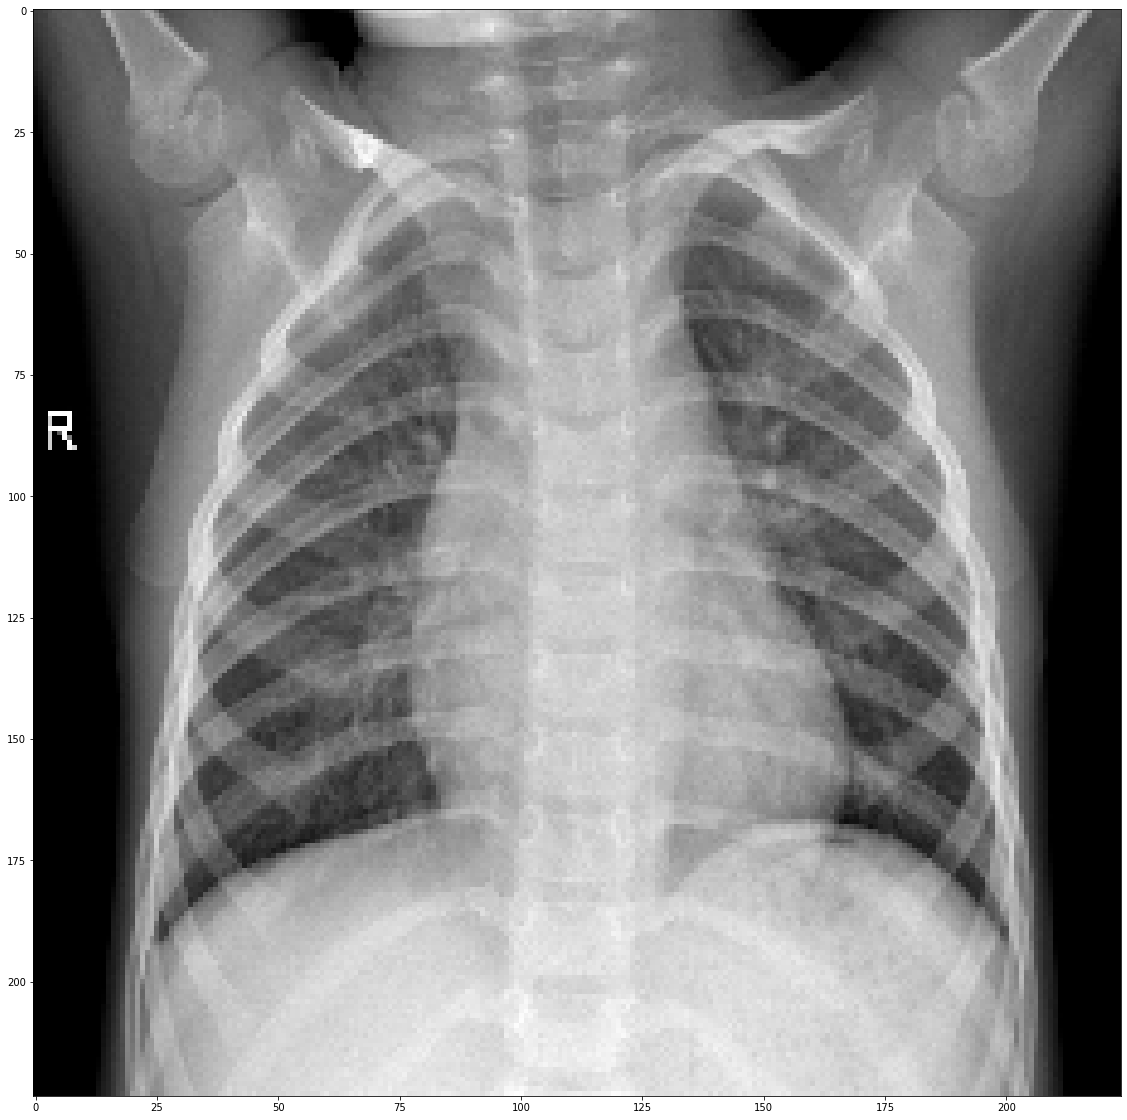

In [ ]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
imgplot = plt.imshow(trainX[0])  ##primeira imagem treino
print(trainY[0]) ##primeira label treino
print(testX.shape)
print(trainY.shape)
